In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, date
import seaborn as sns

# Load Data
* Handle missing values, duplicated values, outlier

In [2]:
total = pd.read_csv("/Users/ibulmnie/Documents/GitHub/ML20222.PredictionBitcoin/data/saved_data.csv")
total['Date'] = pd.to_datetime(total['Date'])

df = total.set_index('Date')
df.head()

,BTC_close,BTC_open,BTC_high,BTC_low,BTC_volume,Active_Addr_Cnt,Difficulty,Mean_Block_Size(in_bytes),Sum_Block_Weight,Total_Fees(USD),...,ETH,LTC,DOGE,XRP,GOLD,SILVER,COPPER,S&P500,DJI,JP225
Date,,,,,,,,,,,,,,,,,,,,,
2023-04-16,30310.3,30299.2,30545.3,30134.6,34.48,840992.0,4.788780e+13,1866594.290,495223185.0,484205.915377,...,2119.29,100.03,0.090465,0.52089,2015.6,25.438,9023.5,4137.64,33885.31,28493.47
2023-04-15,30299.6,30472.6,30586.5,30208.8,31.71,1045660.0,4.788780e+13,1839875.354,631025193.0,630623.285367,...,2090.59,96.66,0.088890,0.51930,2002.2,25.460,9023.5,4137.64,33885.31,28493.47
2023-04-14,30472.5,30387.4,30964.9,30026.0,98.38,1016042.0,4.788780e+13,1759535.436,559166432.0,858535.297189,...,2099.98,96.34,0.088707,0.52269,2002.2,25.460,9023.5,4137.64,33885.31,28493.47
2023-04-13,30387.4,29892.4,30524.1,29864.5,65.87,1009669.0,4.788780e+13,1812112.549,567094231.0,767012.808110,...,2012.11,94.19,0.087344,0.51244,2041.3,25.925,9058.5,4146.22,34030.34,28156.97
2023-04-12,29886.4,30209.8,30473.0,29679.5,78.69,1056542.0,4.788780e+13,1933495.919,635037442.0,757368.783682,...,1916.58,92.02,0.083398,0.50473,2010.9,25.458,8916.5,4091.95,33647.22,28082.70


In [3]:
df.shape

(4654, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4654 entries, 2023-04-16 to 2010-07-20
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   BTC_close                   4654 non-null   float64
 1   BTC_open                    4654 non-null   float64
 2   BTC_high                    4654 non-null   float64
 3   BTC_low                     4654 non-null   float64
 4   BTC_volume                  4654 non-null   float64
 5   Active_Addr_Cnt             4654 non-null   float64
 6   Difficulty                  4654 non-null   float64
 7   Mean_Block_Size(in_bytes)   4654 non-null   float64
 8   Sum_Block_Weight            4654 non-null   float64
 9   Total_Fees(USD)             4654 non-null   float64
 10  Mean_Hashrate               4654 non-null   float64
 11  Xfer_Cnt                    4654 non-null   float64
 12  Mean_Tx_size(native_units)  4654 non-null   float64
 13  ETH            

In [5]:
df.describe()

,BTC_close,BTC_open,BTC_high,BTC_low,BTC_volume,Active_Addr_Cnt,Difficulty,Mean_Block_Size(in_bytes),Sum_Block_Weight,Total_Fees(USD),...,ETH,LTC,DOGE,XRP,GOLD,SILVER,COPPER,S&P500,DJI,JP225
count,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000,4.654000e+03,4.654000e+03,4.654000e+03,4.654000e+03,4.654000e+03,...,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000,4654.000000
mean,8950.828126,8944.396197,9182.648904,8680.543532,144.272183,4.974545e+05,7.399910e+12,6.883463e+05,3.329426e+08,5.498044e+05,...,505.010290,45.052975,0.026408,0.229873,1474.337129,21.657901,7112.199345,2492.349280,21487.496401,18751.425404
std,14517.759120,14515.100053,14900.138248,14078.916437,199.685947,3.731797e+05,1.103629e+13,4.990862e+05,2.151278e+08,1.528054e+06,...,945.449318,63.364718,0.069391,0.334681,253.778406,6.479395,1491.343889,989.044608,7511.506584,6322.971966
min,0.100000,0.100000,0.100000,0.000000,0.170000,4.080000e+02,1.820000e+02,4.164167e+02,2.841400e+05,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,1049.600000,11.772000,0.000000,1047.220000,9985.810000,8160.010000
25%,140.475000,140.400000,145.800000,135.825000,25.407500,8.702175e+04,1.322172e+08,1.656955e+05,1.124594e+08,3.741492e+03,...,0.000000,0.000000,0.000000,0.000000,1260.025000,16.624500,5947.125000,1697.435000,15464.300000,14313.030000
50%,916.050000,915.050000,934.150000,877.350000,63.605000,5.389900e+05,2.840750e+11,7.887917e+05,4.066180e+08,6.090908e+04,...,12.430000,3.870000,0.000000,0.008870,1371.850000,19.570000,6962.000000,2204.720000,19161.280000,19435.830000
75%,9932.450000,9926.450000,10231.950000,9636.050000,158.375000,8.174050e+05,1.389755e+13,1.087807e+06,5.072356e+08,4.321621e+05,...,396.107500,67.199500,0.003335,0.350712,1721.025000,25.340750,8151.437500,3046.155000,26828.202500,22902.512500
max,67527.900000,67528.700000,68990.600000,66334.900000,999.530000,1.366494e+06,4.788780e+13,2.535436e+06,7.584308e+08,2.139776e+07,...,4808.380000,386.820000,0.686880,2.780000,2069.400000,48.599000,10674.000000,4796.560000,36799.650000,30670.100000


<Axes: >

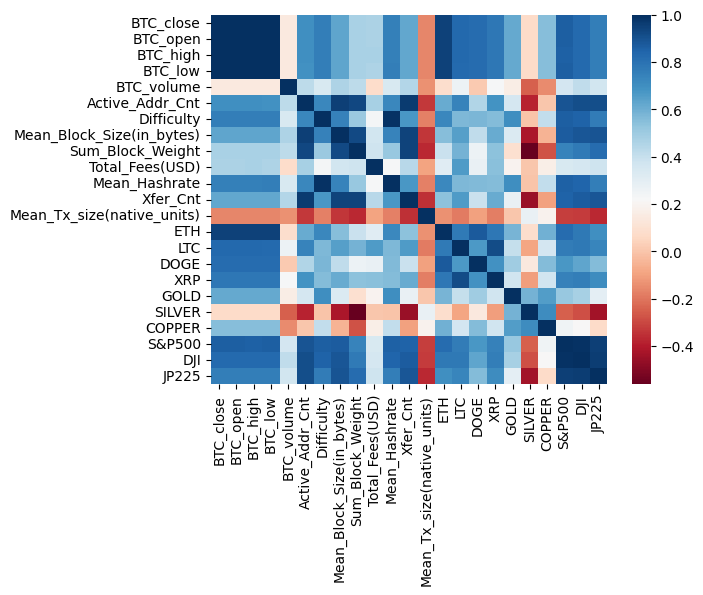

In [6]:
sns.heatmap(df.corr(), cmap="RdBu")

# Slpit Data (Testing, Training Data Sets)

In [7]:
from datetime import datetime

for index in total.index:
    total.loc[index, "Date"] = datetime.strptime(str(total.loc[index, "Date"])[:10], '%Y-%m-%d').date()

Start_day = date(2015, 12, 30)
Test_day = date(2018,4,1)
#chon ra 20-25% data trong giai doan 1
End_day = date(2018,9,30)
# train, test
total = total[(total["Date"] >= Start_day) & (total["Date"] <= End_day)].reset_index(drop = True)
train_dataset = total[total["Date"] < Test_day].reset_index(drop = True)
test_dataset = total[total["Date"] >= Test_day].reset_index(drop = True)


In [8]:
X_train = train_dataset.drop(["Date"], axis=1)[:-1]
y_train = train_dataset["BTC_close"][1:].reset_index(drop=True)

X_test = test_dataset.drop(["Date"], axis=1)[:-1]
y_test = test_dataset["BTC_close"][1:].reset_index(drop=True)

In [9]:
print("Kích thước X_train:", X_train.shape)
print("Kích thước y_train:", y_train.shape)
print("Kích thước X_test:", X_test.shape)
print("Kích thước y_test:", y_test.shape)

Kích thước X_train: (822, 23)
Kích thước y_train: (822,)
Kích thước X_test: (182, 23)
Kích thước y_test: (182,)


# Load Model

In [10]:
#import sklearn modules
import time
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor

In [11]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

## Default

In [12]:
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [13]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
import numpy as np
y_train_pred = rf.predict(X_train)

y_test = np.array(y_test)

def AUC(y_test, y_pred):
    count = 0
    for i in range(1,len(y_test)):
        if (y_test[i] - y_test[i-1]) * (y_pred[i] - y_pred[i-1]) > 0:
            count += 1
    return count/(len(y_test)-1)
print("Test accuracy for train set")
#RMSE
print("Root Mean Square Error (RMSE):", np.sqrt(mean_squared_error(y_train, y_train_pred)))

#MAPE
print("Mean Absolute Percentage Error (MAPE):", mean_absolute_percentage_error(y_train,y_train_pred))
print()

print("Test accuracy for test set")
#RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Square Error (RMSE):", rmse)

#MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print(" Mean Absolute Percentage Error (MAPE):", mape)
print()
AUC = AUC(y_test, y_pred)
#AUC
print("AUC test:", AUC)

Test accuracy for train set
Root Mean Square Error (RMSE): 35.13354994622094
Mean Absolute Percentage Error (MAPE): 0.002284464375415317

Test accuracy for test set
Root Mean Square Error (RMSE): 79.51142996481411
 Mean Absolute Percentage Error (MAPE): 0.008515105822158656

AUC test: 0.9281767955801105


## Tuning 

In [14]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define the range of values for n_estimators
n_estimators = [int(x) for x in np.linspace(start=100, stop=1000, num=10)]
max_depth = [int(x) for x in np.linspace(2, 10, num = 5)]
max_features = [None]
bootstrap = [False] # method used to sample data points

param_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'bootstrap': bootstrap}

print(param_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['sqrt', 'log2', None], 'max_depth': [2, 4, 6, 8, 10], 'bootstrap': [True, False]}


### Randomized Search

In [15]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer

scoring = make_scorer(mean_squared_error, greater_is_better=False)

# Create the RandomizedSearchCV object with early stopping
rf_random = RandomizedSearchCV(estimator=rf, param_distributions = param_grid, scoring=scoring,
                                   cv=200, refit=True, verbose=2,
                                   n_jobs = -1, random_state=42)

In [16]:
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4, 6, 8, 10],
                                        'max_features': ['sqrt', 'log2', None],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42,
                   scoring=make_scorer(mean_squared_error, greater_is_better=False),
                   verbose=2)

In [17]:
print ('Best Parameters: ', rf_random.best_params_)
print("Best RMSE Score: ", rf_random.best_score_)

Best Parameters:  {'n_estimators': 700, 'max_features': None, 'max_depth': 8, 'bootstrap': False}
Best RMSE Score:  -209724.8435900465


### Grid Search

In [18]:
from sklearn.model_selection import GridSearchCV

# Define the scoring function (negative mean squared error)
scoring = make_scorer(mean_squared_error, greater_is_better=False)

# Create the GridSearchCV object with early stopping
rf_Grid = GridSearchCV(estimator=rf, param_grid=param_grid, scoring=scoring,
                           cv=200, refit=True, verbose=2,
                           n_jobs=-1)

In [19]:
rf_Grid.fit(X_train, y_train)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=400; total time=   4.6s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=700; total time=  15.6s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=300; total time=   1.5s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=300; total time=   1.4s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=300; total time=   1.3s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=1000; total time=   4.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=1000; total time=   4.1s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=400; total time=   6.7s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=700; total time=   3.3s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=700; tota

[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=400; total time=   4.5s
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=400; total time=   4.6s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=700; total time=  17.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=1000; total time=   4.4s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=400; total time=   6.7s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=400; total time=   6.4s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=700; total time=   3.1s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=700; total time=   3.2s
[CV] END bootstrap=True, max_depth=8, max_features=log2, n_estimators=1000; total time=   5.6s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=600; total time=   2.2s
[CV] END bootstrap=False, max_depth=2, max_features

[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=400; total time=   4.6s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=700; total time=  15.5s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=700; total time=  16.2s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=400; total time=   6.4s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=700; total time=   3.5s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=700; total time=   3.3s
[CV] END bootstrap=True, max_depth=8, max_features=log2, n_estimators=1000; total time=   5.7s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=600; total time=   2.2s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=600; total time=   2.4s
[CV] END bootstrap=False, max_depth=2, max_features=None, n_estimators=600; total time=   4.8s
[CV] END bootstrap=True, max_depth=2, max_features=s

[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=400; total time=   4.6s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=700; total time=  15.7s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=300; total time=   1.5s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=300; total time=   1.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=1000; total time=   4.6s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=1000; total time=   4.2s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=400; total time=   6.9s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=700; total time=   3.4s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=700; total time=   3.4s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=700; total time=   3.3s
[CV] END bootstrap=True, max_depth=8, max_features

[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=400; total time=   4.6s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=700; total time=  15.6s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=300; total time=   1.5s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=300; total time=   1.4s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=300; total time=   1.3s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=1000; total time=   4.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=1000; total time=   4.0s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=400; total time=   6.8s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=700; total time=   3.3s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=700; total time=   3.5s
[CV] END bootstrap=False, max_depth=4, max_feature

[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=400; total time=   4.5s
[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=400; total time=   4.5s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=700; total time=  17.5s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=1000; total time=   4.3s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=400; total time=   6.7s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=400; total time=   6.4s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=700; total time=   3.1s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=700; total time=   3.2s
[CV] END bootstrap=True, max_depth=8, max_features=log2, n_estimators=1000; total time=   5.6s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=600; total time=   2.2s
[CV] END bootstrap=False, max_depth=2, max_features

[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=400; total time=   4.5s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=700; total time=  15.6s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=700; total time=  16.1s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=400; total time=   6.5s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=700; total time=   3.4s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=700; total time=   3.3s
[CV] END bootstrap=True, max_depth=8, max_features=log2, n_estimators=1000; total time=   5.7s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=600; total time=   2.3s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=600; total time=   2.4s
[CV] END bootstrap=False, max_depth=2, max_features=None, n_estimators=600; total time=   4.9s
[CV] END bootstrap=True, max_depth=2, max_features=s

[CV] END bootstrap=False, max_depth=4, max_features=None, n_estimators=400; total time=   4.5s
[CV] END bootstrap=False, max_depth=8, max_features=None, n_estimators=700; total time=  15.6s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=300; total time=   1.5s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, n_estimators=300; total time=   1.4s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=1000; total time=   4.6s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, n_estimators=1000; total time=   4.2s
[CV] END bootstrap=False, max_depth=6, max_features=None, n_estimators=400; total time=   6.9s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=700; total time=   3.4s
[CV] END bootstrap=False, max_depth=6, max_features=log2, n_estimators=700; total time=   3.4s
[CV] END bootstrap=False, max_depth=4, max_features=log2, n_estimators=700; total time=   3.3s
[CV] END bootstrap=True, max_depth=8, max_features

GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [2, 4, 6, 8, 10],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                          800, 900, 1000]},
             scoring=make_scorer(mean_squared_error, greater_is_better=False),
             verbose=2)

In [20]:
print ('Best Parameters: ', rf_Grid.best_params_)
print("Best RMSE Score: ", rf_Grid.best_score_)

Best Parameters:  {'bootstrap': False, 'max_depth': 10, 'max_features': None, 'n_estimators': 300}
Best RMSE Score:  -205680.18667164084


## Using the best parameters

### Randomized Search

In [21]:
start_time = time.time()

randmf = RandomForestRegressor(**rf_random.best_params_) 
randmf.fit(X_train, y_train) 

end_time = time.time()
all_rand_run_time = end_time - start_time

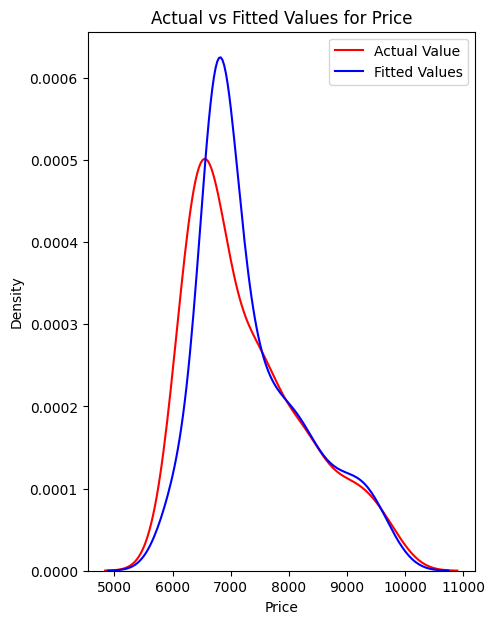

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_rand = randmf.predict(X_test)

plt.figure(figsize=(5, 7))

sns.kdeplot(y_test, color="r", label="Actual Value")
sns.kdeplot(y_pred_rand, color="b", label="Fitted Values")

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.show()
plt.close()


In [23]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
import numpy as np
y_train_rand_pred = randmf.predict(X_train)

y_test = np.array(y_test)

def AUC(y_test, y_pred):
    count = 0
    for i in range(1,len(y_test)):
        if (y_test[i] - y_test[i-1]) * (y_pred[i] - y_pred[i-1]) > 0:
            count += 1
    return count/(len(y_test)-1)
print("Test accuracy for train set")
#RMSE
print("Root Mean Square Error (RMSE):", np.sqrt(mean_squared_error(y_train, y_train_rand_pred)))

#MAPE
print("Mean Absolute Percentage Error (MAPE):", mean_absolute_percentage_error(y_train,y_train_rand_pred))
print()

print("Test accuracy for test set")
#RMSE
rmse_all_rand = np.sqrt(mean_squared_error(y_test, y_pred_rand))
print("Root Mean Square Error (RMSE):", rmse_all_rand)

#MAPE
mape_all_rand = mean_absolute_percentage_error(y_test, y_pred_rand)
print(" Mean Absolute Percentage Error (MAPE):", mape_all_rand)
print()
AUC_all_rand = AUC(y_test, y_pred_rand)
#AUC
print("AUC test:", AUC_all_rand)



Test accuracy for train set
Root Mean Square Error (RMSE): 9.39702318505876
Mean Absolute Percentage Error (MAPE): 0.004079696721041538

Test accuracy for test set
Root Mean Square Error (RMSE): 187.09082852794774
 Mean Absolute Percentage Error (MAPE): 0.020223137550802416

AUC test: 0.7679558011049724


### Grid Search

In [24]:
start_time = time.time()

gridmf = RandomForestRegressor(**rf_Grid.best_params_) 
gridmf.fit(X_train, y_train) 

end_time = time.time()
all_grid_run_time = end_time - start_time

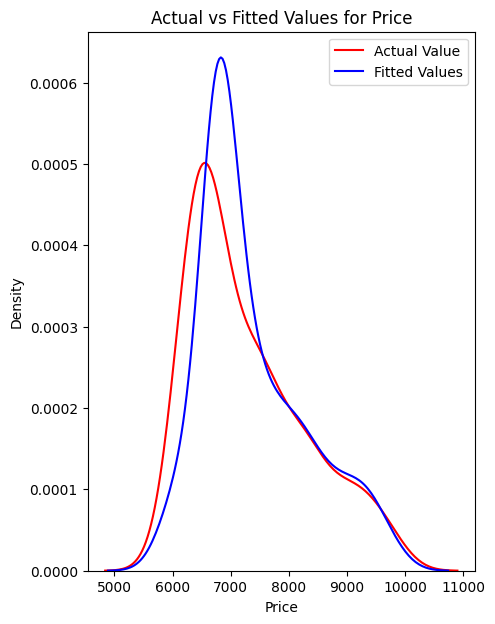

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_grid = gridmf.predict(X_test)

plt.figure(figsize=(5, 7))

sns.kdeplot(y_test, color="r", label="Actual Value")
sns.kdeplot(y_pred_grid, color="b", label="Fitted Values")

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.show()
plt.close()


In [26]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
import numpy as np

y_train_grid_pred = gridmf.predict(X_train)

y_test = np.array(y_test)

def AUC(y_test, y_pred):
    count = 0
    for i in range(1,len(y_test)):
        if (y_test[i] - y_test[i-1]) * (y_pred[i] - y_pred[i-1]) > 0:
            count += 1
    return count/(len(y_test)-1)
print("Test accuracy for train set")
#RMSE
print("Root Mean Square Error (RMSE):", np.sqrt(mean_squared_error(y_train, y_train_grid_pred)))

#MAPE
print("Mean Absolute Percentage Error (MAPE):", mean_absolute_percentage_error(y_train,y_train_grid_pred))
print()

print("Test accuracy for test set")
#RMSE
rmse_all_grid = np.sqrt(mean_squared_error(y_test, y_pred_grid))
print("Root Mean Square Error (RMSE):", rmse_all_grid)

#MAPE
mape_all_grid = mean_absolute_percentage_error(y_test, y_pred_grid)
print(" Mean Absolute Percentage Error (MAPE):", mape_all_grid)
print()
AUC_all_grid = AUC(y_test, y_pred_grid)
#AUC
print("AUC test:", AUC_all_grid)

Test accuracy for train set
Root Mean Square Error (RMSE): 1.1865650552670766
Mean Absolute Percentage Error (MAPE): 0.0006556715623689352

Test accuracy for test set
Root Mean Square Error (RMSE): 194.5154989475494
 Mean Absolute Percentage Error (MAPE): 0.020998433937621637

AUC test: 0.8287292817679558


## Feature Reduction

### Randomized Search

In [27]:
features_rand = X_train.columns
# Get numerical feature importances
importances_rand = list(randmf.feature_importances_)
# List of tuples with variable and importance
feature_importances_rand = [(feature, round(importance, 4)) for feature, importance in zip(features_rand, importances_rand)]
# Sort the feature importances by most important first
feature_importances_rand = sorted(feature_importances_rand, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances_rand]

Variable: BTC_open             Importance: 0.9896
Variable: BTC_high             Importance: 0.0082
Variable: BTC_low              Importance: 0.001
Variable: LTC                  Importance: 0.0003
Variable: XRP                  Importance: 0.0003
Variable: BTC_close            Importance: 0.0002
Variable: ETH                  Importance: 0.0001
Variable: JP225                Importance: 0.0001
Variable: BTC_volume           Importance: 0.0
Variable: Active_Addr_Cnt      Importance: 0.0
Variable: Difficulty           Importance: 0.0
Variable: Mean_Block_Size(in_bytes) Importance: 0.0
Variable: Sum_Block_Weight     Importance: 0.0
Variable: Total_Fees(USD)      Importance: 0.0
Variable: Mean_Hashrate        Importance: 0.0
Variable: Xfer_Cnt             Importance: 0.0
Variable: Mean_Tx_size(native_units) Importance: 0.0
Variable: DOGE                 Importance: 0.0
Variable: GOLD                 Importance: 0.0
Variable: SILVER               Importance: 0.0
Variable: COPPER          

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

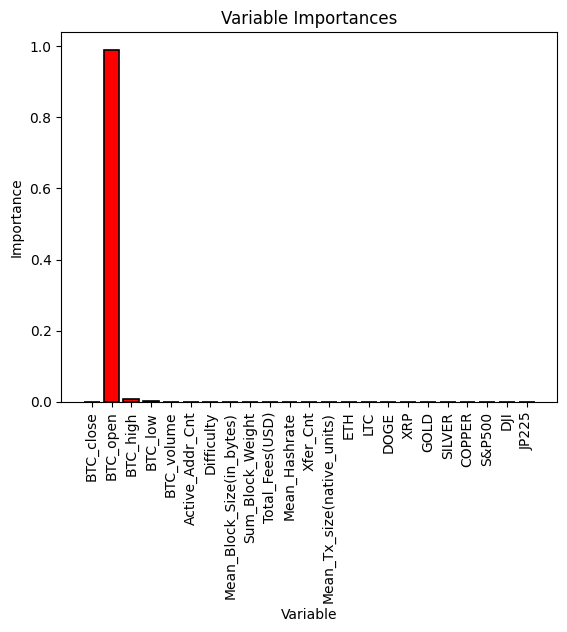

In [28]:
# list of x locations for plotting
x_values = list(range(len(importances_rand)))
# Make a bar chart
plt.bar(x_values, importances_rand, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, features_rand, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

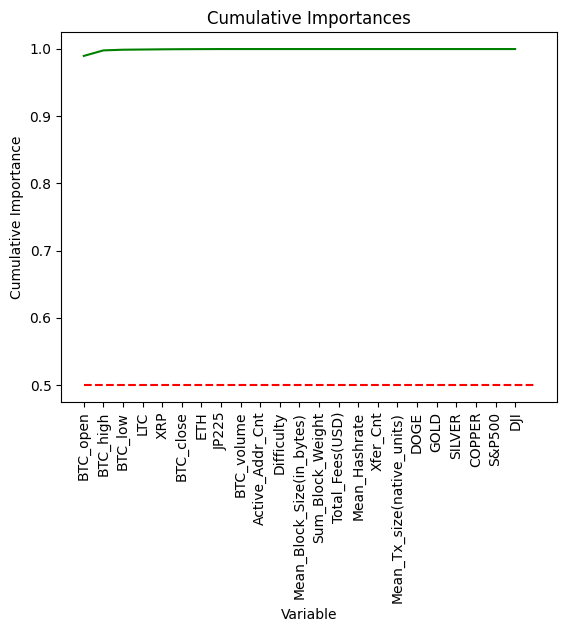

[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=800; total time=   8.0s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=800; total time=   8.4s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=900; total time=   9.4s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=1000; total time=  10.4s
[CV] END bootstrap=True, max_depth=10, max_features=None, n_estimators=100; total time=   2.9s
[CV] END bootstrap=True, max_depth=10, max_features=None, n_estimators=100; total time=   2.9s
[CV] END bootstrap=True, max_depth=10, max_features=None, n_estimators=200; total time=   5.7s
[CV] END bootstrap=True, max_depth=10, max_features=None, n_estimators=300; total time=   8.5s
[CV] END bootstrap=True, max_depth=10, max_features=None, n_estimators=400; total time=  11.3s
[CV] END bootstrap=True, max_depth=10, max_features=None, n_estimators=500; total time=  14.4s
[CV] END bootstrap=True, max_depth=10, max_featur

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=900; total time=   9.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=1000; total time=  10.3s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=100; total time=   1.1s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=200; total time=   2.1s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=200; total time=   2.0s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=300; total time=   3.0s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=400; total time=   4.0s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=500; total time=   5.0s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=500; total time=   5.2s
[CV] END bootstrap=True, max_depth=10, max_featur

In [74]:
# List of features sorted from most to least important
sorted_importances_rand = [importance[1] for importance in feature_importances_rand]
sorted_features_rand = [importance[0] for importance in feature_importances_rand]
# Cumulative importances
cumulative_importances_rand = np.cumsum(sorted_importances_rand)
# Make a line graph
plt.plot(x_values, cumulative_importances_rand, 'g-')
# Draw line at 95% of importance retained
plt.hlines(y = 0.5, xmin=0, xmax=len(sorted_importances_rand), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features_rand, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [72]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
num_rand = np.where(cumulative_importances_rand > 0.95)[0][0] + 1
print('Number of features for 95% importance:', num_rand)

Number of features for 95% importance: 1


In [73]:
# Extract the names of the most important features
important_feature_names_rand = [feature[0] for feature in feature_importances_rand[0:num_rand]]
print(important_feature_names_rand)

['BTC_open']
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=900; total time=   9.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=1000; total time=  10.3s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=200; total time=   2.1s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=200; total time=   2.0s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=300; total time=   3.0s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=400; total time=   4.0s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=400; total time=   4.0s
[CV] END bootstrap=True, max_depth=1

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=900; total time=   9.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=1000; total time=  10.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, n_estimators=1000; total time=  10.3s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=300; total time=   3.0s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=400; total time=   4.0s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=500; total time=   5.0s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=500; total time=   5.0s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=600; total time=   6.0s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=700; total time=   6.9s
[CV] END bootstrap=True, max_depth=10, max_features=log2, n_estimators=800; total time=   8.1s
[CV] END bootstrap=True, max_depth=10, max_featu

In [33]:
train_data_rand = X_train[important_feature_names_rand]
test_data_rand = X_test[important_feature_names_rand]
# Sanity check on operations
print('Important train features shape:', train_data_rand.shape)
print('Important test features shape:', test_data_rand.shape)


Important train features shape: (822, 1)
Important test features shape: (182, 1)


### Grid Search

In [34]:
features_grid = X_train.columns
# Get numerical feature importances
importances_grid = list(gridmf.feature_importances_)
# List of tuples with variable and importance
feature_importances_grid = [(feature, round(importance, 4)) for feature, importance in zip(features_grid, importances_grid)]
# Sort the feature importances by most important first
feature_importances_grid = sorted(feature_importances_grid, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances_grid]

Variable: BTC_open             Importance: 0.9902
Variable: BTC_high             Importance: 0.0078
Variable: BTC_low              Importance: 0.001
Variable: LTC                  Importance: 0.0003
Variable: XRP                  Importance: 0.0003
Variable: BTC_close            Importance: 0.0002
Variable: ETH                  Importance: 0.0001
Variable: JP225                Importance: 0.0001
Variable: BTC_volume           Importance: 0.0
Variable: Active_Addr_Cnt      Importance: 0.0
Variable: Difficulty           Importance: 0.0
Variable: Mean_Block_Size(in_bytes) Importance: 0.0
Variable: Sum_Block_Weight     Importance: 0.0
Variable: Total_Fees(USD)      Importance: 0.0
Variable: Mean_Hashrate        Importance: 0.0
Variable: Xfer_Cnt             Importance: 0.0
Variable: Mean_Tx_size(native_units) Importance: 0.0
Variable: DOGE                 Importance: 0.0
Variable: GOLD                 Importance: 0.0
Variable: SILVER               Importance: 0.0
Variable: COPPER          

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

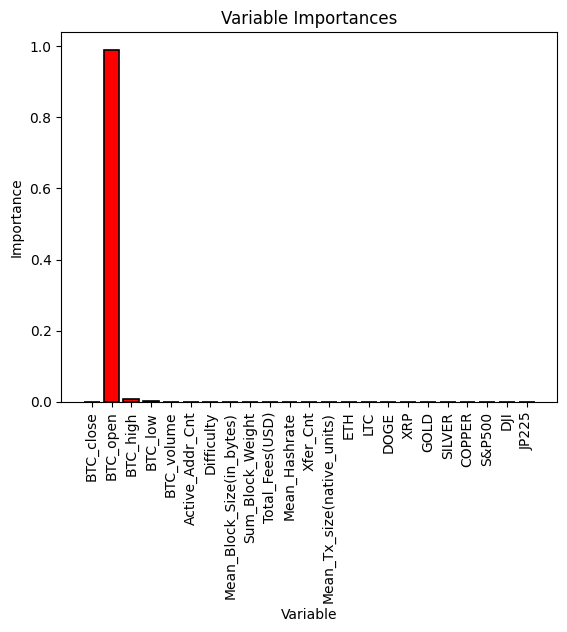

In [35]:
# list of x locations for plotting
x_values = list(range(len(importances_rand)))
# Make a bar chart
plt.bar(x_values, importances_rand, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, features_rand, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

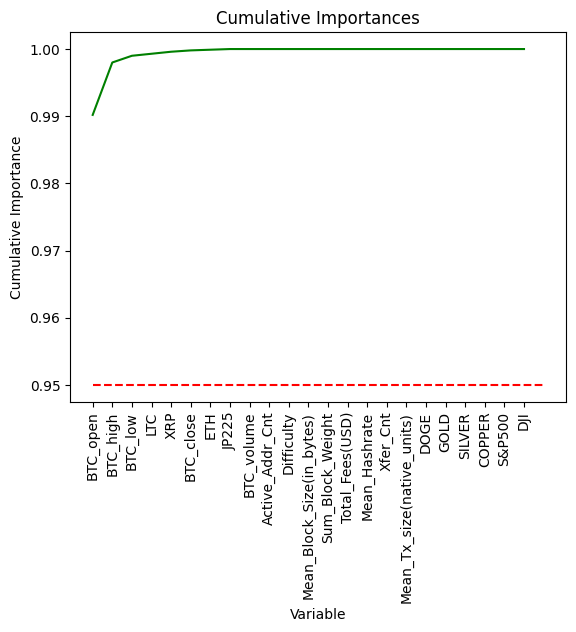

In [36]:
# List of features sorted from most to least important
sorted_importances_grid = [importance[1] for importance in feature_importances_grid]
sorted_features_grid = [importance[0] for importance in feature_importances_grid]
# Cumulative importances
cumulative_importances_grid = np.cumsum(sorted_importances_grid)
# Make a line graph
plt.plot(x_values, cumulative_importances_grid, 'g-')
# Draw line at 95% of importance retained
plt.hlines(y = 0.5, xmin=0, xmax=len(sorted_importances_grid), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features_grid, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [37]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
num_rand = np.where(cumulative_importances_rand > 0.95)[0][0] + 1
print('Number of features for 95% importance:', num_rand)

Number of features for 95% importance: 1


In [47]:
# Extract the names of the most important features
important_feature_names_grid = [feature[0] for feature in feature_importances_grid[0:num_rand]]
print(important_feature_names_grid)

['BTC_open']


In [48]:
train_data_grid = X_train[important_feature_names_grid]
test_data_grid = X_test[important_feature_names_grid]
# Sanity check on operations
print('Important train features shape:', train_data_grid.shape)
print('Important test features shape:', test_data_grid.shape)


Important train features shape: (822, 1)
Important test features shape: (182, 1)


#### Training and Evaluating on Important Features


### Randomized Search

In [49]:
start_time = time.time()

# Train the expanded model on only the important features
randmf.fit(train_data_rand, y_train);

# Make predictions on test data
predictions_rand = randmf.predict(test_data_rand)

end_time = time.time()
reduce_rand_run_time = end_time - start_time

#RMSE
from sklearn.metrics import mean_squared_error
rmse_reduce_rand = np.sqrt(mean_squared_error(y_test, predictions_rand))
print("RMSE:", rmse_reduce_rand)
print()

#MAPE
mape_reduce_rand = np.average(np.abs((y_test - predictions_rand) / y_test))
print("MAPE:", mape_reduce_rand)
print()

AUC_reduce_rand = AUC(np.array(y_test), predictions_rand)
print("AUC test:", AUC_reduce_rand )

RMSE: 46.53341440852428

MAPE: 0.005070916490752575

AUC test: 0.7403314917127072


### Grid Search

In [50]:
start_time = time.time()

# Train the expanded model on only the important features
gridmf.fit(train_data_grid, y_train);

# Make predictions on test data
predictions_grid = gridmf.predict(test_data_grid)

end_time = time.time()
reduce_grid_run_time = end_time - start_time

#RMSE
from sklearn.metrics import mean_squared_error
rmse_reduce_grid = np.sqrt(mean_squared_error(y_test, predictions_grid))
print("RMSE:", rmse_reduce_grid)
print()

#MAPE
mape_reduce_grid = np.average(np.abs((y_test - predictions_grid) / y_test))
print("MAPE:", mape_reduce_grid)
print()

AUC_reduce_grid = AUC(np.array(y_test), predictions_grid)
print("AUC test:", AUC_reduce_grid )

RMSE: 40.292484915418925

MAPE: 0.004339343921771693

AUC test: 0.7900552486187845


#### Normalization with original data

### Randomized Search

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Normalize the features using MinMaxScaler for the training dataset
scaler_all_rand = MinMaxScaler()
X_train_normalized_all_rand = scaler_all_rand.fit_transform(X_train)

# Normalize the features using the same scaler for the testing dataset
X_test_normalized_all_rand = scaler_all_rand.transform(X_test)

In [52]:
rf_regressor_all_rand = RandomForestRegressor(**rf_random.best_params_)

start_time = time.time()

rf_regressor_all_rand.fit(X_train_normalized_all_rand, y_train)

y_pred_norma_all_rand = rf_regressor_all_rand.predict(X_test_normalized_all_rand)

end_time = time.time()
normal_all_rand_run_time = end_time - start_time

from sklearn.metrics import mean_squared_error

#RMSE
from sklearn.metrics import mean_squared_error
rmse_normal_all_rand = np.sqrt(mean_squared_error(y_test, y_pred_norma_all_rand))
print("RMSE:", rmse_normal_all_rand)
print()

#MAPE
mape_normal_all_rand = np.average(np.abs((y_test - y_pred_norma_all_rand) / y_test))
print("MAPE:", mape_normal_all_rand)
print()

AUC_normal_all_rand = AUC(np.array(y_test), y_pred_norma_all_rand)
print("AUC test:", AUC_normal_all_rand )

RMSE: 188.3632655477927

MAPE: 0.020343005189924226

AUC test: 0.7679558011049724


### Grid Search

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Normalize the features using MinMaxScaler for the training dataset
scaler_all_grid = MinMaxScaler()
X_train_normalized_all_grid = scaler_all_grid.fit_transform(X_train)

# Normalize the features using the same scaler for the testing dataset
X_test_normalized_all_grid = scaler_all_grid.transform(X_test)

In [54]:
rf_regressor_all_grid = RandomForestRegressor(**rf_Grid.best_params_)

start_time = time.time()

rf_regressor_all_grid.fit(X_train_normalized_all_grid, y_train)

y_pred_norma_all_grid = rf_regressor_all_grid.predict(X_test_normalized_all_grid)

end_time = time.time()
normal_all_grid_run_time = end_time - start_time

from sklearn.metrics import mean_squared_error

#RMSE
from sklearn.metrics import mean_squared_error
rmse_normal_all_grid = np.sqrt(mean_squared_error(y_test, y_pred_norma_all_grid))
print("RMSE:", rmse_normal_all_rand)
print()

#MAPE
mape_normal_all_grid = np.average(np.abs((y_test - y_pred_norma_all_grid) / y_test))
print("MAPE:", mape_normal_all_grid)
print()

AUC_normal_all_grid = AUC(np.array(y_test), y_pred_norma_all_grid)
print("AUC test:", AUC_normal_all_grid )

RMSE: 188.3632655477927

MAPE: 0.02083764486950253

AUC test: 0.8232044198895028


#### Normalization with Importance Features

### Radomized Search

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Normalize the features using MinMaxScaler for the training dataset
scaler_reduce_rand = MinMaxScaler()
X_train_normalized_reduce_rand = scaler_reduce_rand.fit_transform(train_data_rand)

# Normalize the features using the same scaler for the testing dataset
X_test_normalized_reduce_rand = scaler_reduce_rand.transform(test_data_rand)

In [56]:
rf_regressor_reduce_rand = RandomForestRegressor(**rf_random.best_params_)

start_time = time.time()
rf_regressor_reduce_rand.fit(X_train_normalized_reduce_rand, y_train)

y_pred_norma_reduce_rand = rf_regressor_reduce_rand.predict(X_test_normalized_reduce_rand)

end_time = time.time()
normal_reduce_rand_run_time = end_time - start_time

from sklearn.metrics import mean_squared_error

#RMSE
from sklearn.metrics import mean_squared_error
rmse_normal_reduce_rand = np.sqrt(mean_squared_error(y_test, y_pred_norma_reduce_rand))
print("RMSE:", rmse_normal_reduce_rand)
print()

#MAPE
mape_normal_reduce_rand = np.average(np.abs((y_test - y_pred_norma_reduce_rand) / y_test))
print("MAPE:", mape_normal_reduce_rand)
print()

AUC_normal_reduce_rand = AUC(np.array(y_test), y_pred_norma_reduce_rand)
print("AUC test:", AUC_normal_reduce_rand)

RMSE: 46.53341440852428

MAPE: 0.005070916490752575

AUC test: 0.7403314917127072


### Grid Search

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Normalize the features using MinMaxScaler for the training dataset
scaler_grid = MinMaxScaler()
X_train_normalized_reduce_grid = scaler_grid.fit_transform(train_data_grid)

# Normalize the features using the same scaler for the testing dataset
X_test_normalized_reduce_grid = scaler_grid.transform(test_data_grid)

In [59]:
rf_regressor_reduce_grid = RandomForestRegressor(**rf_Grid.best_params_)

start_time = time.time()
rf_regressor_reduce_grid.fit(X_train_normalized_reduce_grid, y_train)

y_pred_norma_reduce_grid = rf_regressor_reduce_grid.predict(X_test_normalized_reduce_grid)

end_time = time.time()
normal_reduce_grid_run_time = end_time - start_time

from sklearn.metrics import mean_squared_error

#RMSE
from sklearn.metrics import mean_squared_error
rmse_normal_reduce_grid = np.sqrt(mean_squared_error(y_test, y_pred_norma_reduce_grid))
print("RMSE:", rmse_normal_reduce_grid)
print()

#MAPE
mape_normal_reduce_grid = np.average(np.abs((y_test - y_pred_norma_reduce_grid) / y_test))
print("MAPE:", mape_normal_reduce_rand)
print()

AUC_normal_reduce_grid = AUC(np.array(y_test), y_pred_norma_reduce_grid)
print("AUC test:", AUC_normal_reduce_grid)

RMSE: 40.292484915418925

MAPE: 0.005070916490752575

AUC test: 0.7900552486187845


## Summary statistical table

### Randomized Search

In [61]:
def print_results_rand(AUC_all_rand, rmse_all_rand, mape_all_rand, all_rand_run_time, 
                       AUC_reduce_rand, rmse_reduce_rand, mape_reduce_rand, reduce_rand_run_time, 
                  AUC_normal_all_rand, rmse_normal_all_rand, mape_normal_all_rand, normal_all_rand_run_time,
                 AUC_normal_reduce_rand, rmse_normal_reduce_rand, mape_normal_reduce_rand, normal_reduce_rand_run_time):
    headers = ['Type', 'Number of Features','Accuracy', 'RMSE', 'MAPE', 'Run Time (s)']
    all_results = [['All', len(importances_rand), AUC_all_rand, rmse_all_rand, mape_all_rand, all_rand_run_time],
                   ['Reduce', len(important_feature_names_rand), AUC_reduce_rand, rmse_reduce_rand, mape_reduce_rand, reduce_rand_run_time],
                   ['Normalization - All', len(importances_rand), AUC_normal_all_rand, rmse_normal_all_rand, mape_normal_all_rand, normal_all_rand_run_time],
                  ['Normalization - Reduce', len(important_feature_names_rand), AUC_normal_reduce_rand, rmse_normal_reduce_rand, mape_normal_reduce_rand, normal_reduce_rand_run_time]]

    # Calculate the maximum width for each column
    col_widths = [max(len(str(row[i])) for row in all_results + [headers]) for i in range(len(headers))]

    # Print table headers
    header_format = '  '.join(f"{{:<{width}}}" for width in col_widths)
    print(header_format.format(*headers))

    # Print separator row
    separator = '-' * (sum(col_widths) + 3 * (len(col_widths) - 1))
    print(separator)

    # Print table rows
    row_format = '  '.join(f"{{:<{width}}}" for width in col_widths)
    for result in all_results:
        index, num_features, AUC, rmse, mape, run_time = result
        print(row_format.format(index, num_features, AUC, rmse, mape, run_time))
        
print_results_rand(AUC_all_rand, rmse_all_rand, mape_all_rand, all_rand_run_time, 
                       AUC_reduce_rand, rmse_reduce_rand, mape_reduce_rand, reduce_rand_run_time, 
                  AUC_normal_all_rand, rmse_normal_all_rand, mape_normal_all_rand, normal_all_rand_run_time,
                 AUC_normal_reduce_rand, rmse_normal_reduce_rand, mape_normal_reduce_rand, normal_reduce_rand_run_time)


Type                    Number of Features  Accuracy            RMSE                MAPE                  Run Time (s)      
---------------------------------------------------------------------------------------------------------------------------------
All                     23                  0.7679558011049724  187.09082852794774  0.020223137550802416  14.954158306121826
Reduce                  1                   0.7403314917127072  46.53341440852428   0.005070916490752575  2.5904409885406494
Normalization - All     23                  0.7679558011049724  188.3632655477927   0.020343005189924226  16.33820629119873 
Normalization - Reduce  1                   0.7403314917127072  46.53341440852428   0.005070916490752575  2.5271270275115967


### Grid Search

In [63]:
def print_results_rand(AUC_all_grid, rmse_all_grid, mape_all_grid, all_grid_run_time, 
                       AUC_reduce_grid, rmse_reduce_grid, mape_reduce_grid, reduce_grid_run_time, 
                  AUC_normal_all_grid, rmse_normal_all_grid, mape_normal_all_grid, normal_all_grid_run_time,
                 AUC_normal_reduce_grid, rmse_normal_reduce_grid, mape_normal_reduce_grid, normal_reduce_grid_run_time):
    headers = ['Type', 'Number of Features','Accuracy', 'RMSE', 'MAPE', 'Run Time (s)']
    all_results = [['All', len(importances_grid), AUC_all_grid, rmse_all_grid, mape_all_grid, all_grid_run_time],
                   ['Reduce', len(important_feature_names_grid), AUC_reduce_grid, rmse_reduce_grid, mape_reduce_grid, reduce_grid_run_time],
                   ['Normalization - All', len(importances_grid), AUC_normal_all_grid, rmse_normal_all_grid, mape_normal_all_grid, normal_all_grid_run_time],
                  ['Normalization - Reduce', len(important_feature_names_grid), AUC_normal_reduce_grid, rmse_normal_reduce_grid, mape_normal_reduce_grid, normal_reduce_grid_run_time]]

    # Calculate the maximum width for each column
    col_widths = [max(len(str(row[i])) for row in all_results + [headers]) for i in range(len(headers))]

    # Print table headers
    header_format = '  '.join(f"{{:<{width}}}" for width in col_widths)
    print(header_format.format(*headers))

    # Print separator row
    separator = '-' * (sum(col_widths) + 3 * (len(col_widths) - 1))
    print(separator)

    # Print table rows
    row_format = '  '.join(f"{{:<{width}}}" for width in col_widths)
    for result in all_results:
        index, num_features, AUC, rmse, mape, run_time = result
        print(row_format.format(index, num_features, AUC, rmse, mape, run_time))
        
print_results_rand(AUC_all_grid, rmse_all_grid, mape_all_grid, all_grid_run_time, 
                       AUC_reduce_grid, rmse_reduce_grid, mape_reduce_grid, reduce_grid_run_time, 
                  AUC_normal_all_grid, rmse_normal_all_grid, mape_normal_all_grid, normal_all_grid_run_time,
                 AUC_normal_reduce_grid, rmse_normal_reduce_grid, mape_normal_reduce_grid, normal_reduce_grid_run_time)


Type                    Number of Features  Accuracy            RMSE                MAPE                  Run Time (s)      
---------------------------------------------------------------------------------------------------------------------------------
All                     23                  0.8287292817679558  194.5154989475494   0.020998433937621637  7.266822099685669 
Reduce                  1                   0.7900552486187845  40.292484915418925  0.004339343921771693  1.1966631412506104
Normalization - All     23                  0.8232044198895028  194.23684265460417  0.02083764486950253   8.138635873794556 
Normalization - Reduce  1                   0.7900552486187845  40.292484915418925  0.004339343921771693  1.1637730598449707


# Graph Predicted Values with Test Set

### Randomized Search

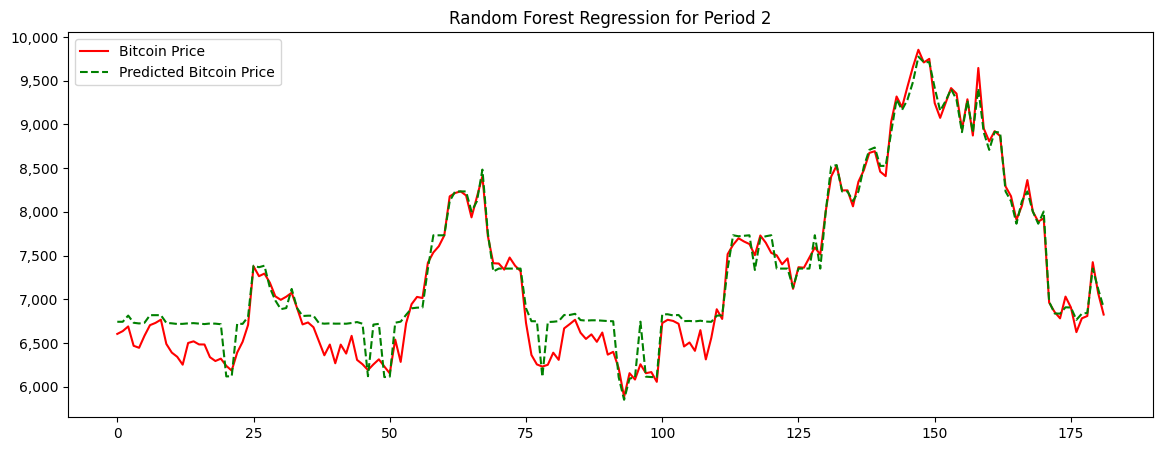

In [64]:

#hien thi ket qua du doan
fig, ax = plt.subplots(1, 1, figsize=(14, 5))
ax.plot(y_test, color = 'red', label="Bitcoin Price")
ax.plot(y_pred_rand, color = 'green', label="Predicted Bitcoin Price", linestyle="dashed")
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))  # .3f
plt.title("Random Forest Regression for Period 2")
plt.legend()
plt.show()

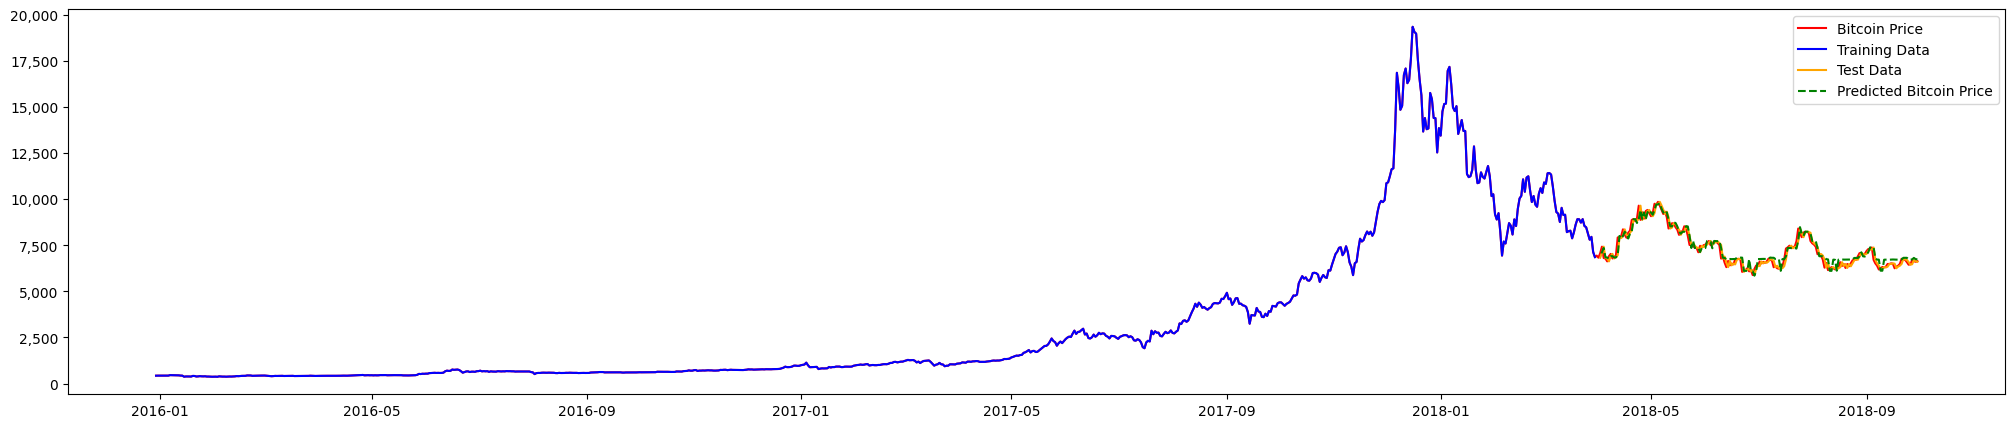

In [65]:
fig, ax = plt.subplots(figsize=(25, 5))

ax.plot(total['Date'], total['BTC_close'], color='red', label="Bitcoin Price")
ax.plot(total['Date'][-len(y_train):], y_train, color='blue', label="Training Data")
ax.plot(total['Date'][:len(y_test)], y_test, color='orange', label="Test Data")
ax.plot(total['Date'][:len(y_pred)], y_pred_rand, color='green', label="Predicted Bitcoin Price", linestyle="dashed")
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) # Định dạng đường trục y
plt.legend()
plt.show()


### Grid Search

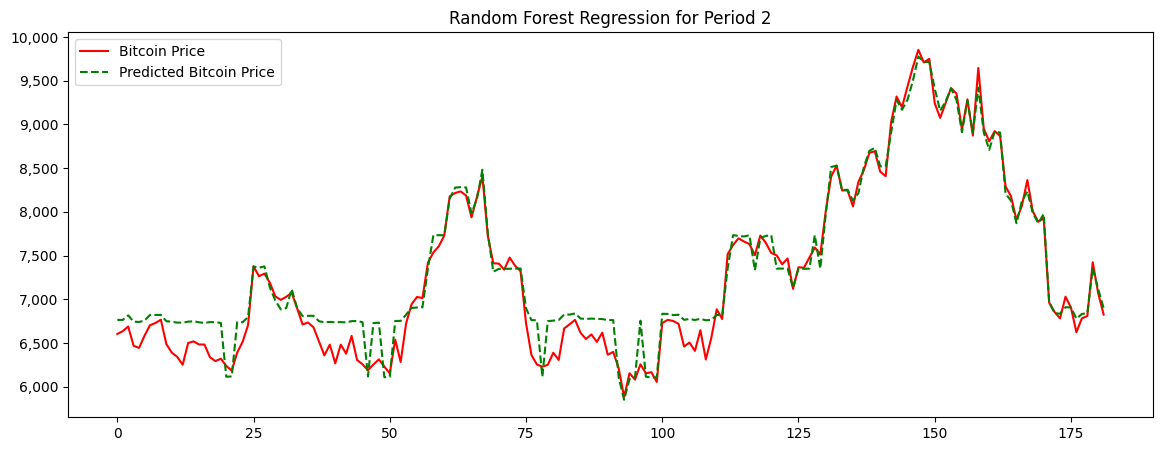

In [66]:

#hien thi ket qua du doan
fig, ax = plt.subplots(1, 1, figsize=(14, 5))
ax.plot(y_test, color = 'red', label="Bitcoin Price")
ax.plot(y_pred_grid, color = 'green', label="Predicted Bitcoin Price", linestyle="dashed")
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))  # .3f
plt.title("Random Forest Regression for Period 2")
plt.legend()
plt.show()

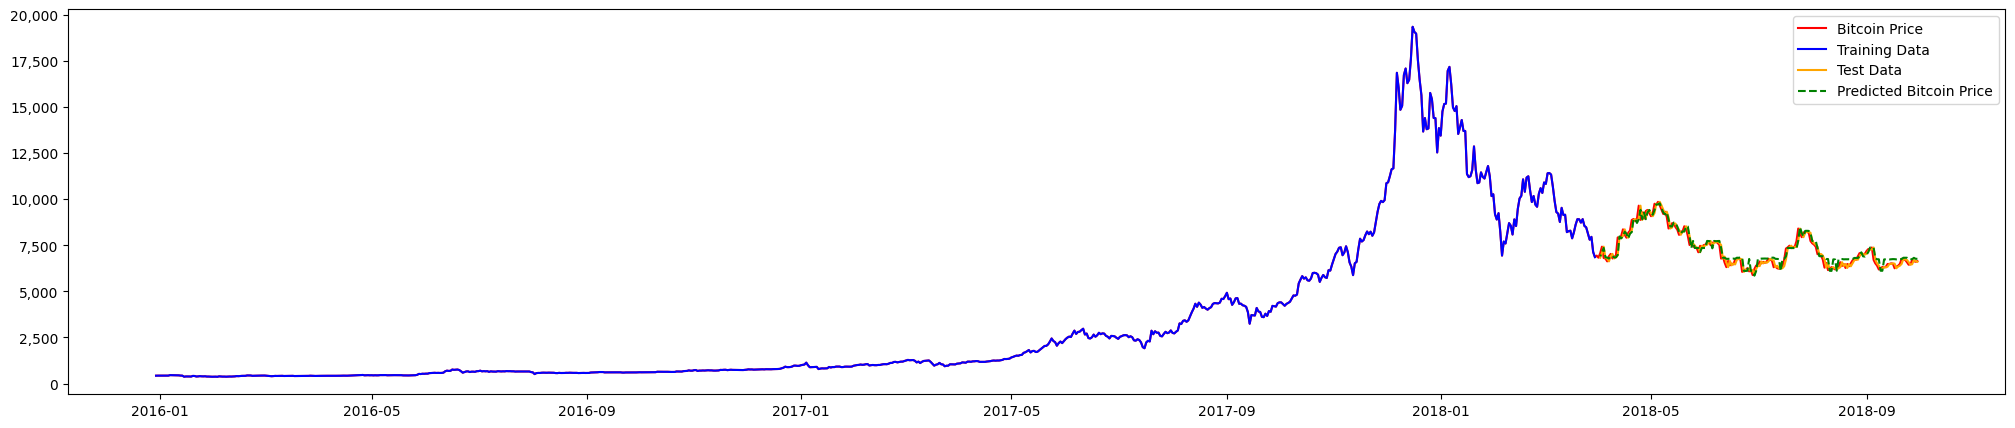

In [67]:
fig, ax = plt.subplots(figsize=(25, 5))

ax.plot(total['Date'], total['BTC_close'], color='red', label="Bitcoin Price")
ax.plot(total['Date'][-len(y_train):], y_train, color='blue', label="Training Data")
ax.plot(total['Date'][:len(y_test)], y_test, color='orange', label="Test Data")
ax.plot(total['Date'][:len(y_pred)], y_pred_grid, color='green', label="Predicted Bitcoin Price", linestyle="dashed")
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) # Định dạng đường trục y
plt.legend()
plt.show()


## Comparing randomized search and grid search for hyperparameter estimation

In [68]:
import numpy as np

from time import time
import scipy.stats as stats
from sklearn.utils.fixes import loguniform

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.linear_model import SGDClassifier


# Utility function to report best scores
def report(results, n_top=10):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results["rank_test_score"] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print(
                "Mean validation score: {0:.3f} (std: {1:.3f})".format(
                    results["mean_test_score"][candidate],
                    results["std_test_score"][candidate],
                )
            )
            print("Parameters: {0}".format(results["params"][candidate]))
            print("")

#### Randomized Search

In [69]:
print((len(rf_random.cv_results_["params"])))
report(rf_random.cv_results_)

10
Model with rank: 1
Mean validation score: -209724.844 (std: 365917.980)
Parameters: {'n_estimators': 700, 'max_features': None, 'max_depth': 8, 'bootstrap': False}

Model with rank: 2
Mean validation score: -215677.364 (std: 366111.454)
Parameters: {'n_estimators': 400, 'max_features': None, 'max_depth': 6, 'bootstrap': False}

Model with rank: 3
Mean validation score: -282679.904 (std: 444436.462)
Parameters: {'n_estimators': 400, 'max_features': None, 'max_depth': 4, 'bootstrap': False}

Model with rank: 4
Mean validation score: -605160.021 (std: 1138887.406)
Parameters: {'n_estimators': 700, 'max_features': 'log2', 'max_depth': 6, 'bootstrap': False}

Model with rank: 5
Mean validation score: -642241.125 (std: 1253395.245)
Parameters: {'n_estimators': 1000, 'max_features': 'log2', 'max_depth': 8, 'bootstrap': True}

Model with rank: 6
Mean validation score: -738719.037 (std: 1342714.324)
Parameters: {'n_estimators': 700, 'max_features': 'log2', 'max_depth': 4, 'bootstrap': False}

#### Grid Search

In [70]:

print((len(rf_Grid.cv_results_["params"])))
report(rf_Grid.cv_results_)

300
Model with rank: 1
Mean validation score: -205680.187 (std: 364077.603)
Parameters: {'bootstrap': False, 'max_depth': 10, 'max_features': None, 'n_estimators': 300}

Model with rank: 2
Mean validation score: -205694.494 (std: 367689.790)
Parameters: {'bootstrap': False, 'max_depth': 8, 'max_features': None, 'n_estimators': 300}

Model with rank: 3
Mean validation score: -208956.259 (std: 364214.974)
Parameters: {'bootstrap': False, 'max_depth': 10, 'max_features': None, 'n_estimators': 1000}

Model with rank: 4
Mean validation score: -209207.962 (std: 371987.857)
Parameters: {'bootstrap': False, 'max_depth': 8, 'max_features': None, 'n_estimators': 600}

Model with rank: 5
Mean validation score: -210573.130 (std: 369330.002)
Parameters: {'bootstrap': False, 'max_depth': 10, 'max_features': None, 'n_estimators': 900}

Model with rank: 6
Mean validation score: -211627.819 (std: 365429.474)
Parameters: {'bootstrap': False, 'max_depth': 8, 'max_features': None, 'n_estimators': 800}

Mo